
- Course: **[DataCamp: Statistical Thinking in Python (Part 1)][1]**
 - This notebook was created as a reproducible reference.
 - The material is from the course

  [1]: https://learn.datacamp.com/courses/statistical-thinking-in-python-part-1

## **Statistical Thinking in Python (Part 1)**

**Course Description**

After all of the hard work of acquiring data and getting them into a form you can work with, you ultimately want to make clear, succinct conclusions from them. This crucial last step of a data analysis pipeline hinges on the principles of statistical inference. In this course, you will start building the foundation you need to think statistically, to speak the language of your data, to understand what they are telling you. The foundations of statistical thinking took decades upon decades to build, but they can be grasped much faster today with the help of computers. With the power of Python-based tools, you will rapidly get up to speed and begin thinking statistically by the end of this course.

**Imports**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from pprint import pprint as pp
import csv
from pathlib import Path
import seaborn as sns
from scipy.stats import binom

from sklearn.datasets import load_iris

**Pandas Configuration Options**

In [2]:
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 300)
pd.set_option('display.expand_frame_repr', True)

**Data Files Location**

* Most data files for the exercises can be found on the [course site](https://www.datacamp.com/courses/statistical-thinking-in-python-part-1)
    * [2008 election results (all states)](https://assets.datacamp.com/production/repositories/469/datasets/8fb59b9a99957c3b9b1c82b623aea54d8ccbcd9f/2008_all_states.csv)
    * [2008 election results (swing states)](https://assets.datacamp.com/production/repositories/469/datasets/e079fddb581197780e1a7b7af2aeeff7242535f0/2008_swing_states.csv)
    * [Belmont Stakes](https://assets.datacamp.com/production/repositories/469/datasets/7507bfed990379f246b4f166ea8a57ecf31c6c9d/belmont.csv)
    * [Speed of light](https://assets.datacamp.com/production/repositories/469/datasets/df23780d215774ff90be0ea93e53f4fb5ebbade8/michelson_speed_of_light.csv)

**Data File Objects**

In [13]:
data = Path.cwd() / 'data' / '2019-07-10_statistical_thinking_1'
elections_all_file = data / '2008_all_states.csv'
elections_swing_file = data / '2008_swing_states.csv'
belmont_file = data / 'belmont.csv'
sol_file = data / 'michelson_speed_of_light.csv'

**Iris Data Set**

In [14]:
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

def iris_typing(x):
    types = {0.0: 'setosa',
             1.0: 'versicolour',
             2.0: 'virginica'}
    return types[x]

iris_df['species'] = iris_df.target.apply(iris_typing)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


# Graphical exploratory data analysis

Look before you leap! A very important proverb, indeed. Prior to diving in headlong into sophisticated statistical inference techniques, you should first explore your data by plotting them and computing simple summary statistics. This process, called exploratory data analysis, is a crucial first step in statistical analysis of data. So it is a fitting subject for the first chapter of Statistical Thinking in Python.

## Introduction to exploratory data analysis

* Exploring the data is a crucial step of the analysis.
    * Organizing
    * Plotting
    * Computing numerical summaries
* This idea is known as exploratory data analysis (EDA)
* "Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone." - [John Tukey](https://en.wikipedia.org/wiki/John_Tukey)

In [17]:
swing = pd.read_csv(elections_swing_file)
swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


* The raw data isn't particularly informative
* We could start computing parameters and their confidence intervals and do hypothesis test...
* ...however, we should graphically explore the data first

### Tukey's comments on EDA

Even though you probably have not read Tukey's book, I suspect you already have a good idea about his viewpoint from the video introducing you to exploratory data analysis. Which of the following quotes is not directly from Tukey?

1. Exploratory data analysis is detective work.
1. There is no excuse for failing to plot and look.
1. The greatest value of a picture is that it forces us to notice what we never expected to see.
1. It is important to understand what you can do before you learn how to measure how well you seem to have done it.
1. ~~**Often times EDA is too time consuming, so it is better to jump right in and do your hypothesis tests.**~~

### Advantages of graphical EDA

Which of the following is not true of graphical EDA?

1. It often involves converting tabular data into graphical form.
1. If done well, graphical representations can allow for more rapid interpretation of data.
1. ~~**A nice looking plot is always the end goal of a statistical analysis.**~~
1. There is no excuse for neglecting to do graphical EDA.

## Plotting a histogram

* always label the axes

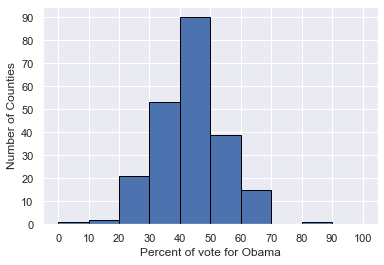

In [31]:
bin_edges = [x for x in range(0, 110, 10)]
plt.hist(x=swing.dem_share, bins=bin_edges, edgecolor='black')
plt.xticks(bin_edges)
plt.yticks(bin_edges[:-1])
plt.xlabel('Percent of vote for Obama')
plt.ylabel('Number of Counties')
plt.show()

**Seaborn**

In [21]:
import seaborn as sns
sns.set()

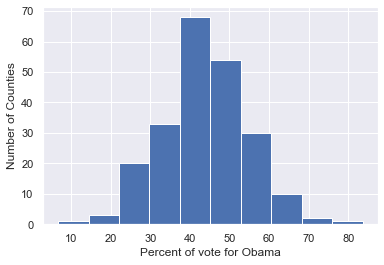

In [22]:
plt.hist(x=swing.dem_share)
plt.xlabel('Percent of vote for Obama')
plt.ylabel('Number of Counties')
plt.show()

### Plotting a histogram of iris data

For the exercises in this section, you will use a classic data set collected by botanist Edward Anderson and made famous by Ronald Fisher, one of the most prolific statisticians in history. Anderson carefully measured the anatomical properties of samples of three different species of iris, *Iris setosa*, *Iris versicolor*, and *Iris virginica*. The full data set is [available as part of scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). Here, you will work with his measurements of petal length.

Plot a histogram of the petal lengths of his 50 samples of Iris versicolor using matplotlib/seaborn's default settings. Recall that to specify the default seaborn style, you can use `sns.set()`, where `sns` is the alias that `seaborn` is imported as.

The subset of the data set containing the Iris versicolor petal lengths in units of centimeters (cm) is stored in the NumPy array `versicolor_petal_length`.

In the video, Justin plotted the histograms by using the `pandas` library and indexing the DataFrame to extract the desired column. Here, however, you only need to use the provided NumPy array. Also, Justin assigned his plotting statements (except for `plt.show()`) to the dummy variable `_`. This is to prevent unnecessary output from being displayed. It is not required for your solutions to these exercises, however it is good practice to use it. Alternatively, if you are working in an interactive environment such as a Jupyter notebook, you could use a `;` after your plotting statements to achieve the same effect. Justin prefers using `_`. Therefore, you will see it used in the solution code.

**Instructions**

* Import `matplotlib.pyplot` and `seaborn` as their usual aliases (`plt` and `sns`).
* Use `seaborn` to set the plotting defaults.
* Plot a histogram of the Iris versicolor petal lengths using `plt.hist()` and the provided NumPy array `versicolor_petal_length`.
* Show the histogram using `plt.show()`.

In [25]:
versicolor_petal_length = iris_df['petal length (cm)'][iris_df.species == 'versicolour']

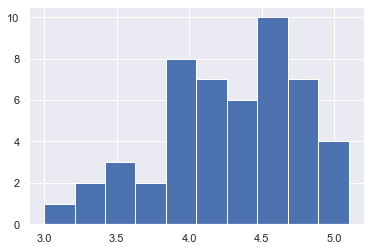

In [26]:
plt.hist(versicolor_petal_length)
plt.show()

### Axis labels!

In the last exercise, you made a nice histogram of petal lengths of Iris versicolor, but **you didn't label the axes!** That's ok; it's not your fault since we didn't ask you to. Now, add axis labels to the plot using `plt.xlabel()` and `plt.ylabel()`. Don't forget to add units and assign both statements to `_`. The packages `matplotlib.pyplot` and `seaborn` are already imported with their standard aliases. This will be the case in what follows, unless specified otherwise.

**Instructions**

* Label the axes. Don't forget that you should always include units in your axis labels. Your y-axis label is just `'count'`. Your x-axis label is `'petal length (cm)'`. The units are essential!
* Display the plot constructed in the above steps using `plt.show()`.

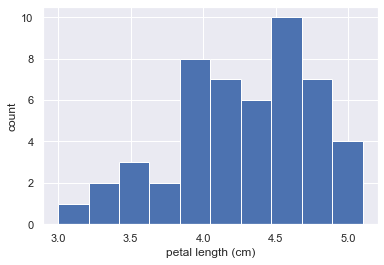

In [27]:
plt.hist(versicolor_petal_length)
plt.xlabel('petal length (cm)')
plt.ylabel('count')
plt.show()

### Adjusting the number of bins in a histogram

The histogram you just made had ten bins. This is the default of matplotlib. The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples. Plot the histogram of Iris versicolor petal lengths again, this time using the square root rule for the number of bins. You specify the number of bins using the `bins` keyword argument of `plt.hist()`.

The plotting utilities are already imported and the seaborn defaults already set. The variable you defined in the last exercise, `versicolor_petal_length`, is already in your namespace.

**Instructions**

* Import `numpy` as `np`. This gives access to the square root function, `np.sqrt()`.
* Determine how many data points you have using `len()`.
* Compute the number of bins using the square root rule.
* Convert the number of bins to an integer using the built in `int()` function.
* Generate the histogram and make sure to use the `bins` keyword argument.
* Hit 'Submit Answer' to plot the figure and see the fruit of your labors!

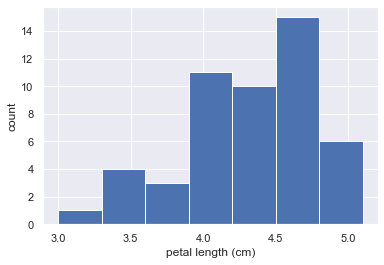

In [38]:
# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
plt.hist(versicolor_petal_length, bins=n_bins)

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')

# Show histogram
plt.show()

## Plotting all of your data: Bee swarm plots

* Binning Bias: The same data may be interpreted differently depending on choice of bins
* Additionally, all of the data isn't being plotted; the precision of the actual data is lost in the bins
* These issues can be resolved with swarm plots
    * Point position along the y-axis is the quantitative information
    * The data are spread in x to make them visible, but their precise location along the x-axis is unimportant
    * No binning bias and all the data are displayed.
    * Seaborn & Pandas

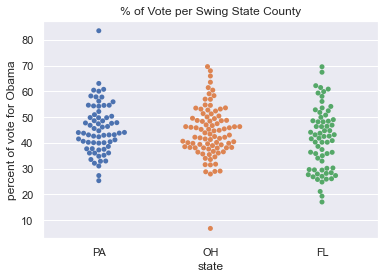

In [41]:
sns.swarmplot(x='state', y='dem_share', data=swing)
plt.xlabel('state')
plt.ylabel('percent of vote for Obama')
plt.title('% of Vote per Swing State County')
plt.show()

### Bee swarm plot

Make a bee swarm plot of the iris petal lengths. Your x-axis should contain each of the three species, and the y-axis the petal lengths. A data frame containing the data is in your namespace as `df`.

For your reference, the code Justin used to create the bee swarm plot in the video is provided below:

```python
_ = sns.swarmplot(x='state', y='dem_share', data=df_swing)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')
plt.show()
```

In the IPython Shell, you can use `sns.swarmplot`? or `help(sns.swarmplot)` for more details on how to make bee swarm plots using seaborn.

**Instructions**

* In the IPython Shell, inspect the DataFrame `df` using `df.head()`. This will let you identify which column names you need to pass as the `x` and `y` keyword arguments in your call to `sns.swarmplot()`.
* Use `sns.swarmplot()` to make a bee swarm plot from the DataFrame containing the Fisher iris data set, `df`. The x-axis should contain each of the three species, and the y-axis should contain the petal lengths.
* Label the axes.
* Show your plot.

In [44]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


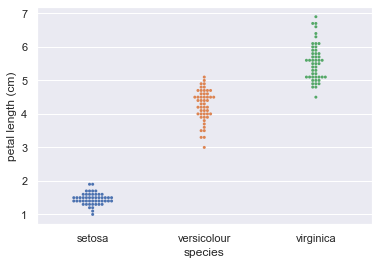

In [43]:
sns.swarmplot(x='species', y='petal length (cm)', data=iris_df, size=3)
plt.xlabel('species')
plt.ylabel('petal length (cm)')
plt.show()

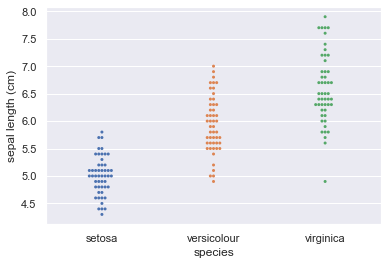

In [45]:
sns.swarmplot(x='species', y='sepal length (cm)', data=iris_df, size=3)
plt.xlabel('species')
plt.ylabel('sepal length (cm)')
plt.show()

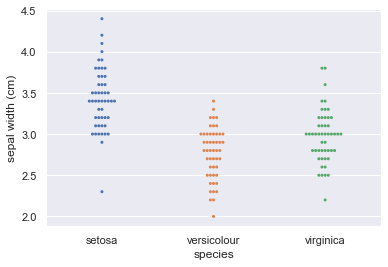

In [46]:
sns.swarmplot(x='species', y='sepal width (cm)', data=iris_df, size=3)
plt.xlabel('species')
plt.ylabel('sepal width (cm)')
plt.show()

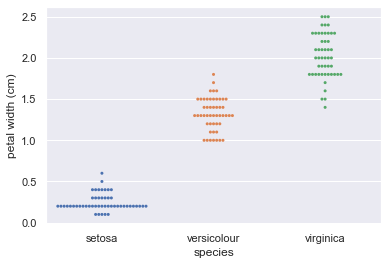

In [47]:
sns.swarmplot(x='species', y='petal width (cm)', data=iris_df, size=3)
plt.xlabel('species')
plt.ylabel('petal width (cm)')
plt.show()

### Interpreting a bee swarm plot

Which of the following conclusions could you draw from the bee swarm plot of iris petal lengths you generated in the previous exercise? For your convenience, the bee swarm plot is regenerated and shown to the right.

**Instructions**

Possible Answers
1. All I. versicolor petals are shorter than I. virginica petals.
1. I. setosa petals have a broader range of lengths than the other two species.
1. __**I. virginica petals tend to be the longest, and I. setosa petals tend to be the shortest of the three species.**__
1. I. versicolor is a hybrid of I. virginica and I. setosa.

## Plotting all of your data: Empirical cumulative distribution functions

* [Empirical Distribution Function](https://en.wikipedia.org/wiki/Empirical_distribution_function)
* [Empirical Distribution Function / Empirical CDF](https://www.statisticshowto.datasciencecentral.com/empirical-distribution-function/)
    * An **empirical cumulative distribution function** (also called the empirical distribution function, **ECDF**, or just **EDF**) and a [cumulative distribution function](https://www.statisticshowto.datasciencecentral.com/cumulative-distribution-function/) are basically the same thing; they are both probability models for data. While ***a CDF is a hypothetical model of a distribution***, **the ECDF models empirical (i.e. observed) data**. To put this another way, __**the ECDF is the [probability distribution](https://www.statisticshowto.datasciencecentral.com/probability-distribution/) you would get if you sampled from your [sample](https://www.statisticshowto.datasciencecentral.com/sample/), instead of the [population](https://www.statisticshowto.datasciencecentral.com/what-is-a-population/)**__. Lets say you have a set of experimental (observed) data $x_{1},x_{2},\,\ldots\,x_{n}$. The EDF will give you the fraction of sample observations less than or equal to a particular value of $x$.
    * More formally, if you have a set of [order statistics](https://www.statisticshowto.datasciencecentral.com/order-statistics/) ($y_{1}<y_{2}<\ldots<y_{n}$) from an observed random sample, then the ***empirical distribution function*** is defined as a sum of [iid random variables](https://www.statisticshowto.datasciencecentral.com/random-variable/):
    * $\hat{F}_{n}(t)=\frac{\text{number of elements in the sample \(\leq t\)}}{n}=\frac{1}{n}\sum_{i=1}^n 1_{X_{i}\leq t}$
    * Where $1_{A}$ = the [indicator](https://en.wikipedia.org/wiki/Indicator_function) of [event](https://en.wikipedia.org/wiki/Event_(probability_theory)) $A$.
* x-value of an ECDF is the quantity being measured
* y-value is the fraction of data points that have a value smaller than the corresponding x-value
* Shows all the data and gives a complete picture of how the data are distributed

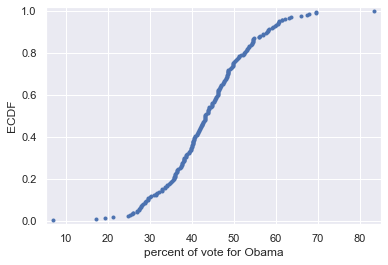

In [48]:
x = np.sort(swing['dem_share'])
y = np.arange(1, len(x)+1) / len(x)

plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('percent of vote for Obama')
plt.ylabel('ECDF')
plt.margins(0.02)  # keep data off plot edges

plt.show()

#### add annotations

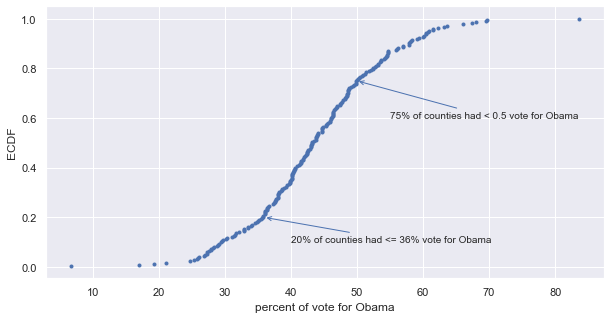

In [56]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.margins(0.05)           # Default margin is 0.05, value 0 means fit

x = np.sort(swing['dem_share'])
y = np.arange(1, len(x)+1) / len(x)

ax.plot(x, y, marker='.', linestyle='none')
plt.xlabel('percent of vote for Obama')
plt.ylabel('ECDF')

ax.annotate('20% of counties had <= 36% vote for Obama', xy=(36, .2),
            xytext=(40, 0.1), fontsize=10, arrowprops=dict(arrowstyle="->", color='b'))

ax.annotate('75% of counties had < 0.5 vote for Obama', xy=(50, .75),
            xytext=(55, 0.6), fontsize=10, arrowprops=dict(arrowstyle="->", color='b'))

plt.show()

#### plot multiple ECDFs

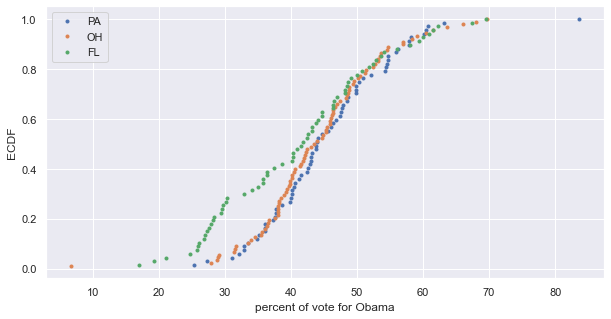

In [62]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.margins(0.05)           # Default margin is 0.05, value 0 means fit

for state in swing.state.unique():
    x = np.sort(swing['dem_share'][swing.state == state])
    y = np.arange(1, len(x)+1) / len(x)
    ax.plot(x, y, marker='.', linestyle='none', label=state)

plt.xlabel('percent of vote for Obama')
plt.ylabel('ECDF')
plt.legend()

plt.show()

### Computing the ECDF

In this exercise, you will write a function that takes as input a 1D array of data and then returns the `x` and `y` values of the ECDF. You will use this function over and over again throughout this course and its sequel. ECDFs are among the most important plots in statistical analysis. You can write your own function, `foo(x,y)` according to the following skeleton:

```python
def foo(a,b):
    """State what function does here"""
    # Computation performed here
    return x, y
```
    
The function `foo()` above takes two arguments `a` and `b` and returns two values `x` and `y`. The function header `def foo(a,b):` contains the function signature `foo(a,b)`, which consists of the function name, along with its parameters. For more on writing your own functions, see [DataCamp's course Python Data Science Toolbox (Part 1)](https://www.datacamp.com/courses/python-data-science-toolbox-part-1)!

**Instructions**

* Define a function with the signature `ecdf(data)`. Within the function definition,
    * Compute the number of data points, `n`, using the `len()` function.
    * The **x**-values are the sorted data. Use the `np.sort()` function to perform the sorting.
    * The **y** data of the ECDF go from `1/n` to `1` in equally spaced increments. You can construct this using `np.arange()`. Remember, however, that the end value in `np.arange()` is not inclusive.  Therefore, `np.arange()` will need to go from `1` to `n+1`. Be sure to divide this by `n`.
    * The function returns the values `x` and `y`.

#### def ecdf()

In [64]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

### Plotting the ECDF

You will now use your `ecdf()` function to compute the ECDF for the petal lengths of Anderson's *Iris versicolor* flowers. You will then plot the ECDF. Recall that your `ecdf()` function returns two arrays so you will need to unpack them. An example of such unpacking is `x, y = foo(data)`, for some function `foo()`.

**Instructions**

* Use `ecdf()` to compute the ECDF of `versicolor_petal_length`. Unpack the output into `x_vers` and `y_vers`.
* Plot the ECDF as dots. Remember to include `marker = '.'` and `linestyle = 'none'` in addition to `x_vers` and `y_vers` as arguments inside `plt.plot()`.
* Label the axes. You can label the y-axis `'ECDF'`.
* Show your plot.

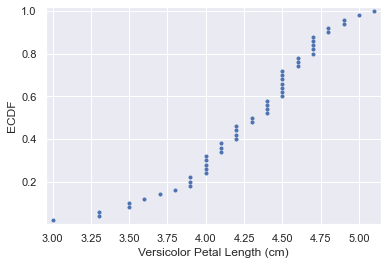

In [65]:
# Compute ECDF for versicolor data: x_vers, y_vers
x, y = ecdf(versicolor_petal_length)

# Generate plot
plt.plot(x, y, marker='.', linestyle='none')

# Label the axes
plt.xlabel('Versicolor Petal Length (cm)')
plt.ylabel('ECDF')

# Display the plot
plt.margins(0.02)  # keep data off plot edges
plt.show()

### Comparison of ECDFs

ECDFs also allow you to compare two or more distributions (though plots get cluttered if you have too many). Here, you will plot ECDFs for the petal lengths of all three iris species. You already wrote a function to generate ECDFs so you can put it to good use!

To overlay all three ECDFs on the same plot, you can use `plt.plot()` three times, once for each ECDF. Remember to include `marker='.'` and `linestyle='none'` as arguments inside `plt.plot()`.

**Instructions**

* Compute ECDFs for each of the three species using your `ecdf()` function. The variables `setosa_petal_length`, `versicolor_petal_length`, and `virginica_petal_length` are all in your namespace. Unpack the ECDFs into `x_set`, `y_set`, `x_vers`, `y_vers` and `x_virg`, `y_virg`, respectively.
* Plot all three ECDFs on the same plot as dots. To do this, you will need three `plt.plot()` commands. Assign the result of each to `_`.
* A legend and axis labels have been added for you, so hit 'Submit Answer' to see all the ECDFs!

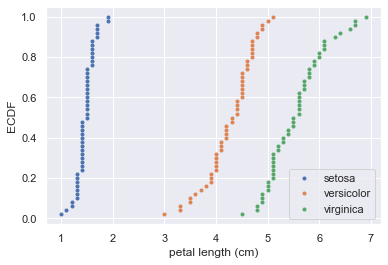

In [68]:
virginica_petal_length = iris_df['petal length (cm)'][iris_df.species == 'virginica']
setosa_petal_length = iris_df['petal length (cm)'][iris_df.species == 'setosa']

# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
plt.plot(x_set, y_set, marker='.', linestyle='none')
plt.plot(x_vers, y_vers, marker='.', linestyle='none')
plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')

# Display the plot
plt.show()

## Onward toward the whole story

* Start with graphical eda!

**Coming up...**

* Thinking probabilistically
* Discrete and continuous distributions
* The power of hacker statistics using np.random()

# Quantitative exploratory data analysis

In the last chapter, you learned how to graphically explore data. In this chapter, you will compute useful summary statistics, which serve to concisely describe salient features of a data set with a few numbers.

## Introduction to summary statistics: The sample mean and median

* mean - average
    * heavily influenced by outliers
    * `np.mean()`
* median - middle value of the sorted dataset
    * immune to outlier influence
    * `np.median()`

### Means and medians

Which one of the following statements is true about means and medians?

**Possible Answers**

* ~~An outlier can significantly affect the value of both the mean and the median.~~
* **An outlier can significantly affect the value of the mean, but not the median.**
* ~~Means and medians are in general both robust to single outliers.~~
* ~~The mean and median are equal if there is an odd number of data points.~~

### Computing means

The mean of all measurements gives an indication of the typical magnitude of a measurement. It is computed using `np.mean()`.

**Instructions**

* Compute the mean petal length of Iris versicolor from Anderson's classic data set. The variable `versicolor_petal_length` is provided in your namespace. Assign the mean to `mean_length_vers`.

In [69]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


#### with pandas.DataFrame

In [71]:
iris_df.groupby(['species']).mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
species,,,,,
setosa,5.006,3.428,1.462,0.246,0.0
versicolour,5.936,2.770,4.260,1.326,1.0
virginica,6.588,2.974,5.552,2.026,2.0


## Percentiles, outliers and box plots

* The median is a special name for the 50th percentile
    * 50% of the data are less than the median
* The 25th percentile is the value of the data point that is greater than 25% of the sorted data
* percentiles are useful summary statistics and can be computed using `np.percentile()`

**Computing Percentiles**

```python
np.percentile(df_swing['dem_share'], [25, 50, 75])
```

![](https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2019-07-10_statistical_thinking_1/box_plot.JPG)

* Box plots are a graphical methode for displying summary statistics
    * median is the middle line: 50th percentile
    * bottom and top line of the box represent the 25th & 75th percentile, repectively
    * the space between the 25th and 75th percentile is the interquartile range (IQR)
    * Whiskers extent a distance of 1.5 time the IQR, or the extent of the data, whichever is less extreme
    * Any points outside the whiskers are plotted as individual points, which we demarcate as outliers
        * There is no single definition for an outlier, however, being more than 2 IQRs away from the median is a common criterion.
        * An outlier is not necessarily erroneous
    * Box plots are a great alternative to bee swarm plots, becasue bee swarm plots become too cluttered with large data sets

In [73]:
all_states = pd.read_csv(elections_all_file)
all_states.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


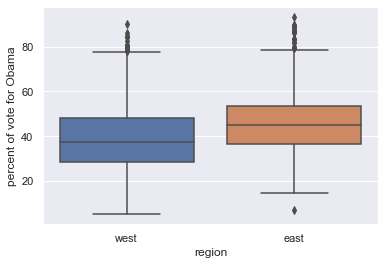

In [74]:
sns.boxplot(x='east_west', y='dem_share', data=all_states)
plt.xlabel('region')
plt.ylabel('percent of vote for Obama')
plt.show()

### Computing percentiles

In this exercise, you will compute the percentiles of petal length of *Iris versicolor*.

**Instructions**

* Create `percentiles`, a NumPy array of percentiles you want to compute. These are the 2.5th, 25th, 50th, 75th, and 97.5th. You can do so by creating a list containing these ints/floats and convert the list to a NumPy array using `np.array()`. For example, `np.array([30, 50])` would create an array consisting of the 30th and 50th percentiles.
* Use `np.percentile()` to compute the percentiles of the petal lengths from the Iris versicolor samples. The variable `versicolor_petal_length` is in your namespace.

In [75]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
ptiles_vers

array([3.3   , 4.    , 4.35  , 4.6   , 4.9775])

### Comparing percentiles to ECDF

To see how the percentiles relate to the ECDF, you will plot the percentiles of Iris versicolor petal lengths you calculated in the last exercise on the ECDF plot you generated in chapter 1. The percentile variables from the previous exercise are available in the workspace as `ptiles_vers` and `percentiles`.

Note that to ensure the Y-axis of the ECDF plot remains between 0 and 1, you will need to rescale the `percentiles` array accordingly - in this case, dividing it by 100.

**Instructions**

* Plot the percentiles as red diamonds on the ECDF. Pass the x and y co-ordinates - `ptiles_vers` and `percentiles/100` - as positional arguments and specify the `marker='D'`, `color='red'` and `linestyle='none'` keyword arguments. The argument for the y-axis - `percentiles/100` has been specified for you.

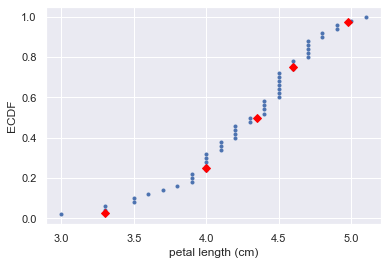

In [78]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
plt.plot(ptiles_vers, percentiles/100, marker='D', color='red', linestyle='none')
plt.show()

### Box-and-whisker plot

Making a box plot for the petal lengths is unnecessary because the iris data set is not too large and the bee swarm plot works fine. However, it is always good to get some practice. Make a box plot of the iris petal lengths. You have a pandas DataFrame, `df`, which contains the petal length data, in your namespace. Inspect the data frame `df` in the IPython shell using `df.head()` to make sure you know what the pertinent columns are.

For your reference, the code used to produce the box plot in the video is provided below:

```python
_ = sns.boxplot(x='east_west', y='dem_share', data=df_all_states)

_ = plt.xlabel('region')

_ = plt.ylabel('percent of vote for Obama')
```

In the IPython Shell, you can use `sns.boxplot?` or `help(sns.boxplot)` for more details on how to make box plots using seaborn.

**Instructions**

* The set-up is exactly the same as for the bee swarm plot; you just call `sns.boxplot()` with the same keyword arguments as you would `sns.swarmplot()`. The x-axis is `'species'` and y-axis is `'petal length (cm)'`.
* Don't forget to label your axes!

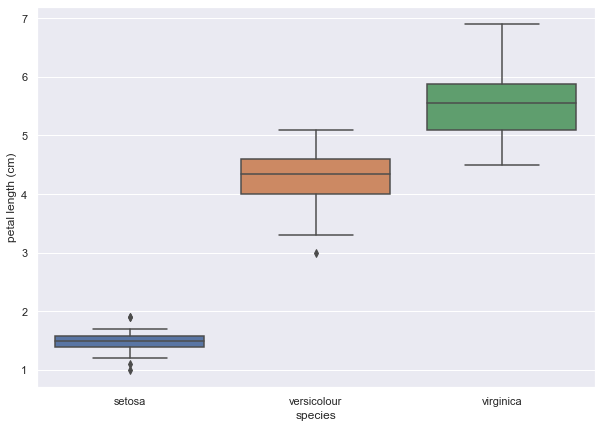

In [79]:
fig, ax = plt.subplots(figsize=(10, 7))
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='species', y='petal length (cm)', data=iris_df)

# Label the axes
_ = plt.ylabel('petal length (cm)')
_ = plt.xlabel('species')

# Show the plot
plt.show()

## Variance and standard deviation

* measures of spread
* variance:
    * The mean squared distance of the data from the mean
    * $$variance = \frac{1}{n}\sum_{i=1}^{n}(x_{i} - \overline{x})^2$$
    * because of the squared quantity, variance doesn't have the same units as the measurement
* standard deviation:
    * $$\sqrt{variance}$$

#### Variance

In [80]:
dem_share_fl = all_states.dem_share[all_states.state == 'FL']

In [81]:
np.var(dem_share_fl)

147.44278618846064

In [83]:
all_states_var = all_states[['state', 'total_votes', 'dem_votes', 'rep_votes', 'other_votes', 'dem_share']].groupby(['state']).var(ddof=0)
all_states_var.dem_share.loc['FL']

147.44278618846064

In [84]:
all_states_var.head()

,total_votes,dem_votes,rep_votes,other_votes,dem_share
state,,,,,
AK,3.918599e+06,9.182529e+05,3.200012e+06,3.256998e+03,125.668270
AL,2.292250e+09,5.607371e+08,6.252062e+08,1.733390e+05,307.070511
AR,4.876461e+08,1.199459e+08,1.314874e+08,1.354781e+05,92.110499
AZ,1.135138e+11,2.266020e+10,3.343506e+10,1.616763e+07,114.874473
CA,2.349814e+11,1.040120e+11,2.620011e+10,9.319614e+07,177.821720


#### Standard Deviation

In [85]:
np.std(dem_share_fl)

12.142602117687158

In [87]:
np.sqrt(np.var(dem_share_fl))

12.142602117687158

In [88]:
all_states_std = all_states[['state', 'total_votes', 'dem_votes', 'rep_votes', 'other_votes', 'dem_share']].groupby(['state']).std(ddof=0)
all_states_std.dem_share.loc['FL']

12.142602117687158

In [89]:
all_states_std.head()

,total_votes,dem_votes,rep_votes,other_votes,dem_share
state,,,,,
AK,1979.545268,958.255147,1788.857869,57.070110,11.210186
AL,47877.444183,23679.887798,25004.123663,416.340031,17.523427
AR,22082.710391,10951.982529,11466.796262,368.073483,9.597421
AZ,336918.128317,150533.043458,182852.572197,4020.899516,10.717951
CA,484748.852298,322508.926289,161864.471516,9653.815033,13.334981


### Computing the variance

It is important to have some understanding of what commonly-used functions are doing under the hood. Though you may already know how to compute variances, this is a beginner course that does not assume so. In this exercise, we will explicitly compute the variance of the petal length of Iris veriscolor using the equations discussed in the videos. We will then use `np.var()` to compute it.

**Instructions**

* Create an array called differences that is the `difference` between the petal lengths (`versicolor_petal_length`) and the mean petal length. The variable `versicolor_petal_length` is already in your namespace as a NumPy array so you can take advantage of NumPy's vectorized operations.
* Square each element in this array. For example, `x**2` squares each element in the array `x`. Store the result as `diff_sq`.
* Compute the mean of the elements in `diff_sq` using `np.mean()`. Store the result as `variance_explicit`.
* Compute the variance of `versicolor_petal_length` using `np.var()`. Store the result as `variance_np`.
* Print both `variance_explicit` and `variance_np` in one `print` call to make sure they are consistent.

In [91]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)

0.21640000000000012 0.21640000000000012


### The standard deviation and the variance

As mentioned in the video, the standard deviation is the square root of the variance. You will see this for yourself by computing the standard deviation using `np.std()` and comparing it to what you get by computing the variance with `np.var()` and then computing the square root.

**Instructions**

* Compute the variance of the data in the `versicolor_petal_length` array using `np.var()` and store it in a variable called `variance`.
* Print the square root of this value.
* Print the standard deviation of the data in the `versicolor_petal_length` array using `np.std()`

In [92]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
std_explicit = np.sqrt(variance)

# Print the standard deviation
std_np = np.std(versicolor_petal_length)

print(std_explicit, std_np)

0.4651881339845204 0.4651881339845204


## Covariance and Pearson correlation coefficient

![covariance](https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2019-07-10_statistical_thinking_1/covariance.JPG)

* Covariance
    * $$covariance = \frac{1}{n}\sum_{i=1}^{n}(x_{i} - \overline{x})(y_{i} - \overline{y})$$
    * The data point differs from the mean vote share and the mean total votes for Obama
    * The differences for each data point can be computed
    * The covariance is the mean of the product of these differences
    * If both x and y tend to be above or below their respective means together, as they are in this data set, the covariance is positive.
        * This means they are positively correlated:
            * When x is high, so is y
            * When the county is populous, it has more votes for Obama
    * If x is high while y is low, the covariance is negative
        * This means they are negatively correlated (anticorrelated) - not the case for this data set.
        
![pearson](https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2019-07-10_statistical_thinking_1/pearson.JPG)

* Pearson correlation
    * A more generally applicable measure of how two variables depend on each other, should be dimensionless (not units).
    * $$\rho = Pearson\space correlation = \frac{covariance}{(std\space of\space x)(std\space of\space y)}$$
    * $$\rho = \frac{variability\space due\space to\space codependence}{independent\space variability}$$
    * Comparison of the variability in the data due to codependence (the covariance) to the variability inherent to each variable independently (their standard deviations).
    * It's dimensionless and ranges from -1 (for complete anticorrelation) to 1 (for complete correlation).
    * A value of zero means there is no correlation between the data, as shown in the upper left plot.
    * Good metric for correlation between two variables.

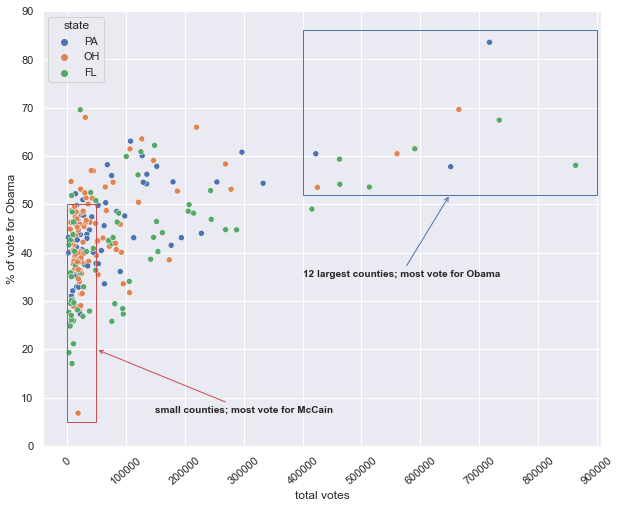

In [93]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='total_votes', y='dem_share', data=swing, hue='state')
plt.xlabel('total votes')
plt.ylabel('% of vote for Obama')
plt.xticks([x for x in range(0, 1000000, 100000)], rotation=40)
plt.yticks([x for x in range(0, 100, 10)])

# Create a Rectangle patch
plt.gca().add_patch(Rectangle((400000, 52), 500000, 34, linewidth=1, edgecolor='b', facecolor='none'))

plt.gca().add_patch(Rectangle((0, 5), 50000, 45, linewidth=1, edgecolor='r', facecolor='none'))

# Annotate
plt.annotate('12 largest counties; most vote for Obama', xy=(650000, 52), weight='bold',
             xytext=(400000, 35), fontsize=10, arrowprops=dict(arrowstyle="->", color='b'))

plt.annotate('small counties; most vote for McCain', xy=(50000, 20), weight='bold',
             xytext=(150000, 7), fontsize=10, arrowprops=dict(arrowstyle="->", color='r'))

plt.show()

### Scatter plots

When you made bee swarm plots, box plots, and ECDF plots in previous exercises, you compared the petal lengths of different species of iris. But what if you want to compare two properties of a single species? This is exactly what we will do in this exercise. We will make a **scatter plot** of the petal length and width measurements of Anderson's Iris versicolor flowers. If the flower scales (that is, it preserves its proportion as it grows), we would expect the length and width to be correlated.

For your reference, the code used to produce the scatter plot in the video is provided below:

```python
_ = plt.plot(total_votes/1000, dem_share, marker='.', linestyle='none')
_ = plt.xlabel('total votes (thousands)')
_ = plt.ylabel('percent of vote for Obama')
```

**Instructions**

* Use `plt.plot()` with the appropriate keyword arguments to make a scatter plot of versicolor petal length (x-axis) versus petal width (y-axis). The variables `versicolor_petal_length` and `versicolor_petal_width` are already in your namespace. Do not forget to use the `marker='.'` and `linestyle='none'` keyword arguments.
* Label the axes.
* Display the plot.

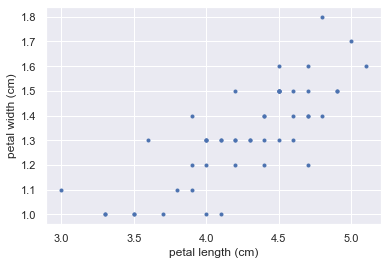

In [94]:
versicolor_petal_width = iris_df['petal width (cm)'][iris_df.species == 'versicolour']

# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('petal width (cm)')

# Show the result
plt.show()

### Variance and covariance by looking

![](https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2019-07-10_statistical_thinking_1/var_covar_by_looking.JPG)

Consider four scatter plots of x-y data, appearing to the right. Which has, respectively,

* the highest variance in the variable x,
* the highest covariance,
* negative covariance?

**Instructions**

Possible Answers
* ~~a, c, b~~
* ~~d, c, a~~
* __**d, c, b**__
* ~~d, d, b~~

### Computing the covariance

The covariance may be computed using the Numpy function `np.cov()`. For example, we have two sets of data `x` and `y`, `np.cov(x, y)` returns a 2D array where entries `[0,1]` and `[1,0]` are the covariances. Entry `[0,0]` is the variance of the data in x, and entry `[1,1]` is the variance of the data in `y`. This 2D output array is called the covariance matrix, since it organizes the self- and covariance.

To remind you how the *I. versicolor* petal length and width are related, we include the scatter plot you generated in a previous exercise.

**Instructions**

* Use `np.cov()` to compute the covariance matrix for the petal length (`versicolor_petal_length`) and width (`versicolor_petal_width`) of *I. versicolor*.
* Print the covariance matrix.
* Extract the covariance from entry `[0,1]` of the covariance matrix. Note that by symmetry, entry `[1,0]` is the same as entry `[0,1]`.
* Print the covariance.

In [98]:
iris_df[['petal length (cm)', 'petal width (cm)']][iris_df.species == 'versicolour'].cov()

,petal length (cm),petal width (cm)
petal length (cm),0.220816,0.073102
petal width (cm),0.073102,0.039106


In [99]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
covariance_matrix

array([[0.22081633, 0.07310204],
       [0.07310204, 0.03910612]])

In [100]:
# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0, 1]

# Print the length/width covariance
petal_cov

0.07310204081632653

### Computing the Pearson correlation coefficient

As mentioned in the video, the Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance. It is computed using the `np.corrcoef()` function. Like `np.cov()`, it takes two arrays as arguments and returns a 2D array. Entries `[0,0]` and `[1,1]` are necessarily equal to 1 (can you think about why?), and the value we are after is entry `[0,1]`.

In this exercise, you will write a function, `pearson_r(x, y)` that takes in two arrays and returns the Pearson correlation coefficient. You will then use this function to compute it for the petal lengths and widths of *I. versicolor*.

Again, we include the scatter plot you generated in a previous exercise to remind you how the petal width and length are related.

**Instructions**

* Define a function with signature `pearson_r(x, y)`.
    * Use `np.corrcoef()` to compute the correlation matrix of `x` and `y` (pass them to `np.corrcoef()` in that order).
    * The function returns entry `[0,1]` of the correlation matrix.
* Compute the Pearson correlation between the data in the arrays `versicolor_petal_length` and `versicolor_petal_width`. Assign the result to `r`.
* Print the result.

In [101]:
iris_df[['petal length (cm)', 'petal width (cm)']][iris_df.species == 'versicolour'].corr()

,petal length (cm),petal width (cm)
petal length (cm),1.000000,0.786668
petal width (cm),0.786668,1.000000


In [102]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169


# Thinking probabilistically: Discrete variables

Statistical inference rests upon probability. Because we can very rarely say anything meaningful with absolute certainty from data, we use probabilistic language to make quantitative statements about data. In this chapter, you will learn how to think probabilistically about discrete quantities, those that can only take certain values, like integers. It is an important first step in building the probabilistic language necessary to think statistically.

## Probabilistic logic and statistical inference

* Probabilistic reasoning allows us to describe uncertainty
* Given a set of data, you describe probabilistically what you might expect if those data were acquired repeatedly
* This is the heart of statistical inference
* It's the process by which we go from measured data to probabilistic conclusions about what we might expect if we collected the same data again.

### What is the goal of statistical inference?

Why do we do statistical inference?

**Possible Answers**

* To draw probabilistic conclusions about what we might expect if we collected the same data again.
* To draw actionable conclusions from data.
* To draw more general conclusions from relatively few data or observations.
* __**All of these.**__

### Why do we use the language of probablility?

Which of the following is not a reason why we use probabilistic language in statistical inference?

**Possible Answers**

* Probability provides a measure of uncertainty.
* __**Probabilistic language is not very precise.**__
* Data are almost never exactly the same when acquired again, and probability allows us to say how much we expect them to vary.

## Random number generators and hacker statistics

* Instead o repeating data acquisition over and over, repeated measurements can be simulated
* The concepts of probabilities originated from games of chance
* What's the probability of getting 4 heads with 4 flips of a coin?
* This type of data can be generated using `np.random.random`
    * drawn a number between 0 and 1
    * $<0.5\longrightarrow\text{heads}$
    * $\geq0.5\longrightarrow\text{tails}$
    * The pseudo random number generator works by starting with an integer, called a seed, and then generates random numbers in succession
    * The same seed gives the same sequence of random numbers
    * Manually seed the random number generator for reproducible results
    * Specified using `np.random.seed()`

#### Bernoulli Trial

* An experiment that has two options, "success" (True) and "failure" (False).

#### Hacker stats probabilities

* Determine how to simulate data
* Simulated it repeatedly
* Compute the fraction of trials that had the outcome of interest
    * Probability is approximately the fraction of trials with the outcome of interest

#### Simulated coin flips

In [104]:
np.random.seed(42)
random_numbers = np.random.random(size=4)

random_numbers

array([0.37454012, 0.95071431, 0.73199394, 0.59865848])

In [105]:
heads = random_numbers < 0.5

heads

array([ True, False, False, False])

In [106]:
np.sum(heads)

1

* The number of heads can be computed by summing the array of Booleans, because in numerical contexts, Python treats True as 1 and False as 0.
* We want to know the probability of getting four heads if we were to repeatedly flip the 4 coins

* without `list comprehension`

```python
n_all_heads = 0  # initialize number of 4-heads trials

for _ in range(10000):
    heads = np.random.random(size=4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1
```

* with `list comprehension`

In [107]:
n_all_heads = sum([1 for _ in range(10000) if sum(np.random.random(size=4) < 0.5) == 4])

In [108]:
n_all_heads

619

In [109]:
n_all_heads/10000

0.0619

### Generating random numbers using the `np.random` module

We will be hammering the `np.random` module for the rest of this course and its sequel. Actually, you will probably call functions from this module more than any other while wearing your hacker statistician hat. Let's start by taking its simplest function, `np.random.random()` for a test spin. The function returns a random number between zero and one. Call `np.random.random()` a few times in the IPython shell. You should see numbers jumping around between zero and one.

In this exercise, we'll generate lots of random numbers between zero and one, and then plot a histogram of the results. If the numbers are truly random, all bars in the histogram should be of (close to) equal height.

You may have noticed that, in the video, Justin generated 4 random numbers by passing the keyword argument `size=4` to `np.random.random()`. Such an approach is more efficient than a `for` loop: in this exercise, however, you will write a `for` loop to experience hacker statistics as the practice of repeating an experiment over and over again.

**Instructions**

* Seed the random number generator using the seed `42`.
* Initialize an empty array, `random_numbers`, of 100,000 entries to store the random numbers. Make sure you use `np.empty(100000)` to do this.
* Write a `for` loop to draw 100,000 random numbers using `np.random.random()`, storing them in the `random_numbers` array. To do so, loop over `range(100000)`.
* Plot a histogram of `random_numbers`. It is not necessary to label the axes in this case because we are just checking the random number generator. Hit 'Submit Answer' to show your plot.

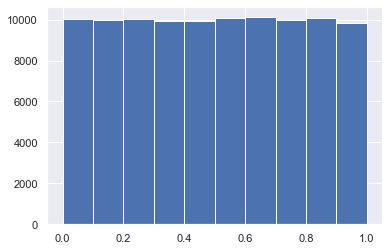

In [110]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

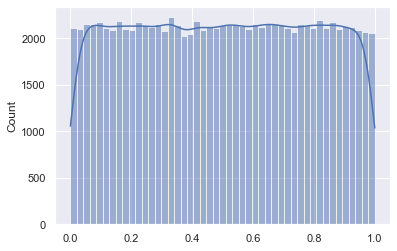

In [111]:
sns.histplot(random_numbers, kde=True)
plt.show()

**The histogram is nearly flat across the top, indicating there is equal chance a randomly-generated number is in any of the histogram bins.**

* [Generating Random Numbers With `NumPy`](https://chrisalbon.com/python/basics/generating_random_numbers_with_numpy/)

#### Using `np.random.rand`

In [112]:
rand_num = np.random.rand(100000)

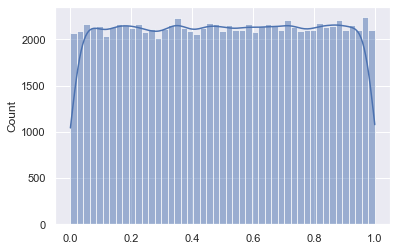

In [113]:
sns.histplot(rand_num, kde=True)
plt.show()

### The np.random module and Bernoulli trials

You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability ***p*** of landing heads (success) and probability ***1−p*** of landing tails (failure). In this exercise, you will write a function to perform `n` [Bernoulli trials](https://en.wikipedia.org/wiki/Bernoulli_trial), `perform_bernoulli_trials(n, p)`, which returns the number of successes out of `n` Bernoulli trials, each of which has probability `p` of success. To perform each Bernoulli trial, use the `np.random.random()` function, which returns a random number between zero and one.

**Instructions**

* Define a function with signature `perform_bernoulli_trials(n, p)`.
    * Initialize to zero a variable `n_success` the counter of `True` occurrences, which are Bernoulli trial successes.
    * Write a `for` loop where you perform a Bernoulli trial in each iteration and increment the number of success if the result is `True`. Perform `n` iterations by looping over `range(n)`.
        * To perform a Bernoulli trial, choose a random number between zero and one using `np.random.random()`. If the number you chose is less than `p`, increment n_success (use the `+= 1` operator to achieve this).
* The function returns the number of successes `n_success`.

#### def perform_bernoulli_trials()

In [114]:
def perform_bernoulli_trials(n: int=100000, p: float=0.5) -> int:
    """
    Perform n Bernoulli trials with success probability p
    and return number of successes.
    n: number of iterations
    p: target number between 0 and 1, inclusive
    """
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

##### With `list comprehension`

In [115]:
def perform_bernoulli_trials(n: int=100000, p: float=0.5) -> int:
    """
    Perform n Bernoulli trials with success probability p
    and return number of successes.
    n: number of iterations
    p: target number between 0 and 1, inclusive
    """

    return sum([1 for _ in range(n) if np.random.random() < p])

### How many defaults might we expect?

Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is `p = 0.05`. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the `perform_bernoulli_trials()` function you wrote in the previous exercise and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to `True`, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

**Instructions**

* Seed the random number generator to 42.
* Initialize `n_defaults`, an empty array, using `np.empty()`. It should contain 1000 entries, since we are doing 1000 simulations.
* Write a `for` loop with `1000` iterations to compute the number of defaults per 100 loans using the `perform_bernoulli_trials()` function. It accepts two arguments: the number of trials `n` - in this case 100 - and the probability of success `p` - in this case the probability of a default, which is `0.05`. On each iteration of the loop store the result in an entry of `n_defaults`.
* Plot a histogram of `n_defaults`. Include the `normed=True` keyword argument so that the height of the bars of the histogram indicate the probability.

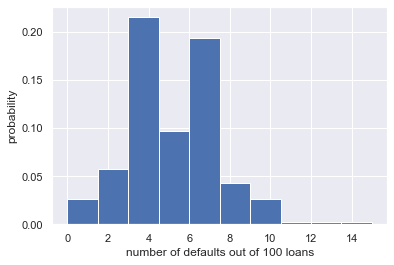

In [116]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; label your axes
plt.hist(n_defaults, density=True)
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('probability')

# Show the plot
plt.show()

**This is not an optimal way to plot a histogram when the results are known to be integers. This will be revisited in forthcoming exercises.**

#### With `list comprehension`

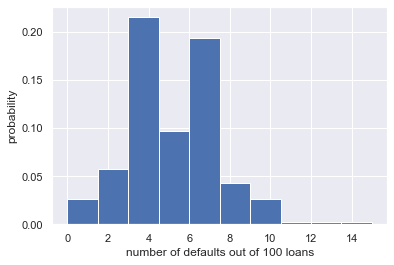

In [117]:
np.random.seed(42)
n_defaults = np.asarray([perform_bernoulli_trials(100, 0.05) for _ in range(1000)])

plt.hist(n_defaults, density=True)
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('probability')
plt.show()

### Will the bank fail?

Using `def ecdf()` from the first section, plot the number of `n_defaults` from the previous exercise, as a CDF.

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

**Instructions**

* Compute the `x` and `y` values for the ECDF of `n_defaults`.
* Plot the ECDF, making sure to label the axes. Remember to include `marker='.'` and `linestyle='none'` in addition to `x` and `y` in your call `plt.plot()`.
* Show the plot.
* Compute the total number of entries in your `n_defaults` array that were greater than or equal to 10. To do so, compute a boolean array that tells you whether a given entry of `n_defaults` is `>= 10`. Then sum all the entries in this array using `np.sum()`. For example, `np.sum(n_defaults <= 5)` would compute the number of defaults with 5 or *fewer* defaults.
* The probability that the bank loses money is the fraction of `n_defaults` that are greater than or equal to 10.

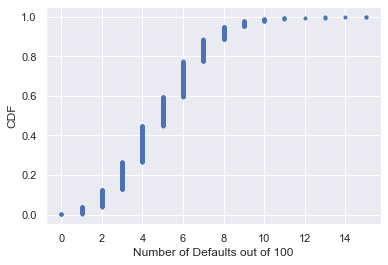

Probability of losing money = 0.022


In [118]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Number of Defaults out of 100')
plt.ylabel('CDF')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

**As might be expected, about 5/100 defaults occur. There's about a 2% chance of getting 10 or more defaults out of 100 loans.**

## Probability distributions and stories: The Binomial distribution

* [Probability Distributions in Python](https://www.datacamp.com/community/tutorials/probability-distributions-python)

#### Probability Mass Function (PMF)

* [Probability mass function](https://en.wikipedia.org/wiki/Probability_mass_function)
* The set of probabilities of discrete outcomes
* PMF is a property of a discrete probability distribution

#### Discrete Uniform PMF

* ![](https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2019-07-10_statistical_thinking_1/discrete_uniform_pmf.JPG)
* The outcomes are discrete because only certain values may be attained; there is not option for 3.7
* Each result has a uniform probability of 1/6

#### Probability Distribution

* [Probability distribution](https://en.wikipedia.org/wiki/Probability_distribution)
* A mathematical description of outcomes

#### Discrete Uniform Distribution

* [Discrete uniform distribution](https://en.wikipedia.org/wiki/Discrete_uniform_distribution)
* The outcome of rolling a single fair die, is Discrete Uniformly distributed

#### Binomial Distribution

* [Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution)
* The number ***r*** of successes in ***n*** Bernoulli trials with probability ***p*** of success, is Binomially distributed
* The number ***r*** of heads in 4 coin flips with probability ***p = 0.5*** of heads, is Binomially distributed

In [119]:
np.random.binomial(4, 0.5)

2

In [120]:
np.random.binomial(4, 0.5, size=10)

array([2, 2, 2, 2, 2, 3, 3, 2, 2, 0])

##### Binomial PMF

* To plot the Binomial PMF, take 10000 samples from a Binomial distribution of 60 Bernoulli trials with a probability of success of 0.1
* The most likely number of successes is 6 out of 60, but it's possible to get as many as 11 or as few as 1
* [`scipy.stats.binom`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html)

In [121]:
np.random.seed(42)
samples = np.random.binomial(60, 0.1, size=10_000)
samples

array([ 5, 10,  7, ..., 10,  5,  4])

![](https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2019-07-10_statistical_thinking_1/binomial_pmf.JPG)

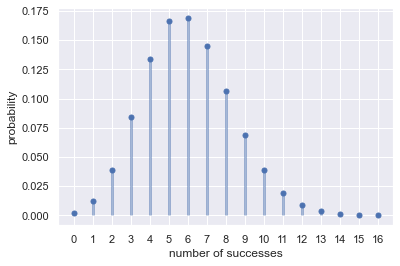

In [122]:
n, p = 60, 0.1
x = [x for x in range(17)]

fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=3, alpha=0.5)
plt.xticks(x)
plt.ylabel('probability')
plt.xlabel('number of successes')
plt.show()

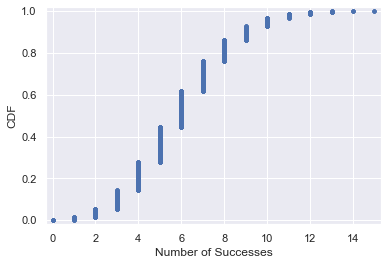

In [123]:
sns.set()
x, y = ecdf(samples)

plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Number of Successes')
plt.ylabel('CDF')
plt.show()

### Sampling out of the Binomial distribution

Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using `np.random.binomial()`. This is identical to the calculation you did in the last set of exercises using your custom-written `perform_bernoulli_trials()` function, but far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1000. After taking the samples, plot the CDF as last time. This CDF that you are plotting is that of the Binomial distribution.

Note: For this exercise and all going forward, the random number generator is pre-seeded for you (with `np.random.seed(42)`) to save you typing that each time.

**Instructions**

* Draw samples out of the Binomial distribution using `np.random.binomial()`. You should use parameters `n = 100` and `p = 0.05`, and set the `size = 10000`.
* Compute the CDF using your previously-written `ecdf()` function.
* Plot the CDF with axis labels. The x-axis here is the ***number of defaults out of 100 loans***, while the y-axis is the ***CDF***.

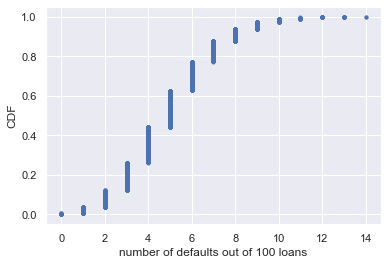

In [124]:
# Take 10,000 samples out of the binomial distribution: n_defaults
np.random.seed(42)
n_defaults = np.random.binomial(100, 0.05, size=10_000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('CDF')
plt.show()

### Plotting the Binomial PMF

As mentioned in the video, plotting a nice looking PMF requires a bit of matplotlib trickery that we will not go into here. Instead, we will plot the PMF of the Binomial distribution as a histogram with skills you have already learned. The trick is setting up the edges of the bins to pass to `plt.hist()` via the `bins` keyword argument. We want the bins centered on the integers. So, the edges of the bins should be `-0.5, 0.5, 1.5, 2.5, ...` up to `max(n_defaults) + 1.5`. You can generate an array like this using `np.arange()` and then subtracting `0.5` from the array.

You have already sampled out of the Binomial distribution during your exercises on loan defaults, and the resulting samples are in the NumPy array `n_defaults`.

**Instructions**

* Using `np.arange()`, compute the bin edges such that the bins are centered on the integers. Store the resulting array in the variable `bins`.
* Use `plt.hist()` to plot the histogram of `n_defaults` with the `normed=True` and `bins=bins` keyword arguments.

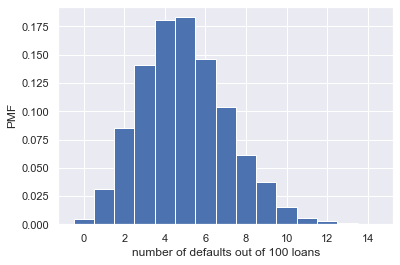

In [125]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults, density=True, bins=bins)

# Label axes
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('PMF')

# Show the plot
plt.show()

## Poisson processes and the Poisson distribution

* [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution)
* The timing of the next event is completely independent of when the previous event occurred
* Examples of Poisson processes:
    * Natural births in a given hospital
        * There is a well-defined average number of natural births per year, and the timing of one birth is independent of the timing of the previous one
    * Hits on a website during a given hour
        * The timing of successive hits is independent of the timing of the previous hit
    * Meteor strikes
    * Molecular collisions in a gas
    * Aviation incidents
* The number of arrivals of a Poisson process in a given amount of time is Poisson distributed
* The number of arrivals ***r*** of a Poisson process in a given time interval with average rate of arrivals $\lambda$ per interval is Poisson distributed
    * The Poisson distribution has one parameter, the average number of arrivals in a given length of time
* The number of hits ***r*** on a website in one hour with an average hit rate of 6 hits per hour is Poisson distributed

#### Poisson PMF

* ![poisson pmf](https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2019-07-10_statistical_thinking_1/poisson_pmf.JPG)
* For the preceding plot, for a given hour, the site is likely to get 6 hits, which is the average, but it's possible to also get 10, or none
* This looks like the Binomial PMF from **3.3.0.5.1. Binomial PMF**
    The Poisson distribution is a limit of the Binomial distribution for low probability of success and large number of trials, i.e. for rare events
* To sample from the Poisson distribution, use `np.random.poisson`.
    * It also has the size keyword argument to allow multiple samples
    * The Poisson CDF resembles the Binomial CDF

#### Poisson CDF

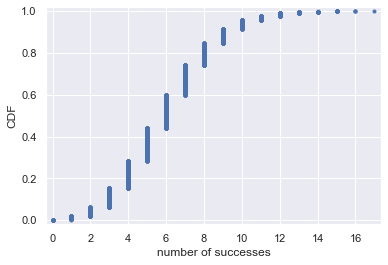

In [126]:
samples = np.random.poisson(6, size=10_000)
x, y = ecdf(samples)

plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('number of successes')
plt.ylabel('CDF')
plt.show()

### Relationship between Binomial and Poisson distribution

You just heard that the Poisson distribution is a limit of the Binomial distribution for rare events. This makes sense if you think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story we discussed in the video, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to ***np*** approximates a Binomial distribution for n Bernoulli trials with probability ***p*** of success (with ***n*** large and ***p*** small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

Let's explore these two distributions computationally. You will compute the mean and standard deviation of samples from a Poisson distribution with an arrival rate of 10. Then, you will compute the mean and standard deviation of samples from a Binomial distribution with parameters n and p such that ***np=10***.

**Instructions**

* Using the `np.random.poisson()` function, draw `10000` samples from a Poisson distribution with a mean of `10`.
* Make a list of the `n` and `p` values to consider for the Binomial distribution. Choose `n = [20, 100, 1000]` and `p = [0.5, 0.1, 0.01]` so that ***np*** is always 10.
* Using `np.random.binomial()` inside the provided `for` loop, draw `10000` samples from a Binomial distribution with each `n, p` pair and print the mean and standard deviation of the samples. There are 3 `n, p` pairs: `20, 0.5`, `100, 0.1`, and `1000, 0.01`. These can be accessed inside the loop as `n[i], p[i]`.

In [132]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print(f'Poisson: Mean = {np.mean(samples_poisson)} Std = {np.std(samples_poisson):0.03f}')

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000, 10000]
p = [0.5, 0.1, 0.01, 0.001]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(4):
    samples_binomial = np.random.binomial(n[i], p[i], size=10_000)

    # Print results
    print(f'n = {n[i]} Binom: Mean = {np.mean(samples_binomial)} Std = {np.std(samples_binomial):0.03f}')

Poisson: Mean = 9.986 Std = 3.150
n = 20 Binom: Mean = 10.0315 Std = 2.233
n = 100 Binom: Mean = 10.0259 Std = 2.943
n = 1000 Binom: Mean = 10.0149 Std = 3.185
n = 10000 Binom: Mean = 10.0646 Std = 3.172


**The means are all about the same. The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability p gets lower and lower.**

### How many no-hitters in a season?

In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games. The ECDF of the number of no-hitters in a season is shown to the right. Which probability distribution would be appropriate to describe the number of no-hitters we would expect in a given season?

* ![no hitters ecdf](https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2019-07-10_statistical_thinking_1/no_hitter_ecdf.JPG)

***Note***: The no-hitter data set was scraped and calculated from the data sets available at [retrosheet.org](http://www.retrosheet.org/) ([license](http://www.retrosheet.org/notice.txt)).

**Possible Answers**

* ~~Discrete uniform~~
* ~~Binomial~~
* ~~Poisson~~
* __**Both Binomial and Poisson, though Poisson is easier to model and compute.**__
* ~~Both Binomial and Poisson, though Binomial is easier to model and compute.~~

**With rare events (low p, high n), the Binomial distribution is Poisson. This has a single parameter, the mean number of successes per time interval, in this case the mean number of no-hitters per season.**

### Was 2015 anomalous?

1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

**Instructions**

* Draw `10000` samples from a Poisson distribution with a mean of `251/115` and assign to `n_nohitters`.
* Determine how many of your samples had a result greater than or equal to `7` and assign to `n_large`.
* Compute the probability, `p_large`, of having `7` or more no-hitters by dividing `n_large` by the total number of samples (`10000`).
* Hit 'Submit Answer' to print the probability that you calculated.

In [135]:
np.random.seed(seed=398)

# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size=10_000)

# Compute number of samples that are seven or greater: n_large
n_large = len(n_nohitters[n_nohitters >= 7])

# Compute probability of getting seven or more: p_large
p_large = n_large/len(n_nohitters)

# Print the result
print(f'Probability of seven or more no-hitters: {p_large}')

Probability of seven or more no-hitters: 0.0071


**The result is about 0.007. This means that it is not that improbable to see a 7-or-more no-hitter season in a century. There have been two in a century and a half, so it is not unreasonable.**

# Thinking probabilistically: Continuous variables

Probability distributions of discrete variables have been covered so far. This final section will cover continuous variables, such as those that can take on any fractional value. Many of the principles are the same, but there are some subtleties. At the end of this chapter, you will be speaking the probabilistic language required to launch into the inference techniques covered in [Statistical Thinking in Python (Part 2)](https://www.datacamp.com/courses/statistical-thinking-in-python-part-2).

## Probability density functions

We have talked about probabilities of discrete quantities, such as die rolls and number of bus arrivals, but what about continuous quantities?  A continuous quantity can take on any value, not just discrete ones.  For example, the speed of a train can be 45.76 km/h.  Continuous variables also have probability distributions.  Let's consider an example.  In 1879, Albert Michelson performed 100 measurements of the speed of light in air.  Each measurement has some error in it; conditions, such as temperature, humidity, alignment of his optics, etc., change from measurement to measurement.  As a result, any fractional value of the measured speed of light is possible, so it's apt to describe the results with a continuous probability distribution.  In looking at Michelson's numbers, show here in units of 1000 km/s, we see this is the case.  **What probability distribution describes these data?**  I posit, these data follow the **Normal Distribution**.  To understand what the normal distribution is, lets consider its **probability density function** (PDF).  This is the continuous analog to the **probability mass function** (PMF).  ___It describes the chances of observing a  value of a continuous variable___.  The probability of observing a single value of the speed of light, does not make sense, because there is an infinity of numbers, between 299,600 and 300,100 km/s.  Instead, areas under the PDF, give probabilities.  The probability of measuring the speed of light is greater the 300,000 km/s is an area under the normal curve.  Parameterizing the PDF based on Michelson's experiments, this is about a 3% chance, since the pink region is about 3% of the total area under the PDF.  To do this calculation, we were really just looking at the cumulative distribution function (CDF), of the Normal distribution.  Here's the CDF of the Normal distribution.  Remember, the CDF gives the probability, the measured speed of light will be less than the value on the x-axis.  Reading off the value at 300,000 km/s, there is a 97% chance, the speed of light measurement, is less than that.  There's about a 3% chance it's greater.

We will study the Normal distribution in more depth in the coming exercises, but for now, let's review some of the concepts we've learned about continuous distribution functions.

### Continuous Variables
- Quantities that can take any value, not just discrete values

### Probability Density Function (PDF)
- Continuous analog to the PMF
- Mathematical description of the relative likelihood of observing a value of a continuous variable

![area under pdf][1]

### Normal Cumulative Distribution Function (CDF)

![cdf][2]
![cdf_97][3]

 [1]: https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2019-07-10_statistical_thinking_1/area_under_pdf.JPG
 [2]: https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2019-07-10_statistical_thinking_1/cdf.JPG
 [3]: https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2019-07-10_statistical_thinking_1/cdf_97.JPG

In [143]:
df = pd.read_csv(sol_file)
df.drop(columns=['Unnamed: 0'], inplace=True)
df.columns = df.columns.str.strip()
df.head(2)

,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,June 5,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,June 7,2,72,114.64,0.074,114.56,0.10,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles


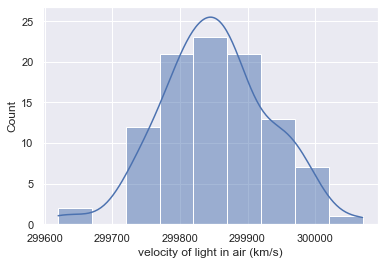

In [144]:
sns.histplot(df['velocity of light in air (km/s)'], bins=9, kde=True)
plt.show()

### Interpreting PDFs

Consider the PDF shown here. Which of the following is true?

![interpret_pdf][1]

**Instructions**

* __**x is more likely than not less than 10.**__
* ~~___x___ is more likely than not greater than 10.~~
* ~~We cannot tell from the PDF if ___x___ is more likely to be greater than or less than 10.~~
* ~~This is not a valid PDF because it has two peaks.~~

 [1]: https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2019-07-10_statistical_thinking_1/interpret_pdf.JPG

### Interpreting CDFs

At right is the CDF corresponding to the PDF you considered in the last exercise. Using the CDF, what is the probability that **x** is greater than 10?

![interpret_cdf][1]

**Instructions**

* __**0.25: Correct! The value of the CDF at x = 10 is 0.75, so the probability that x < 10 is 0.75. Thus, the probability that x > 10 is 0.25.**__
* ~~0.75~~
* ~~3.75~~
* ~~15~~

 [1]: https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2019-07-10_statistical_thinking_1/interpret_cdf.JPG

## Introduction to the Normal distribution

The Normal distribution is famous, and we just used it as an example to learn about continuous distributions.  It describes a continuous variable whose PDF is symmetric and has a single peak.  The Normal distribution is parameterized by two parameters.  The **mean** determines where the center of the peak is.  The **standard deviation** is a measure of how wide the peak is, or how spread out the data are.  Note, the mean and standard deviation are the names of the parameters of the Normal distribution.  **Don't confuse these with the mean and standard deviation we computed directly from the data when doing exploratory data analysis**.  The nomenclature is confusing, but it's important to keep straight.  Adding a histogram of the Michelson measurements, shows the measured speed of light in air, looks Normally distributed.  Comparing the histogram to the PDF, suffers from binning bias, therefore, it's better to compare the ECDF of the data, to the theoretical CDF of the Normal distribution.  To compute the theoretical CDF, use `np.random.normal`, to draw samples, then compute the CDF.  As was the case with sampling out of the binomial distribution, we need to provide parameters, in this case, the mean and standard deviation, to parameterize the Normal distribution we are sampling out of.  The mean and standard deviations computed from the data are good estimates, so we'll compute and pass them into `np.random.normal` to take our samples.  We then use the `def ecdf` function we already wrote, to compute the ECDFs of the data and of the Normally distributed theoretical samples we just drew.  Finally, plot the theoretical and empirical CDFs on the same plot.  With the absence of binning bias, it's much clearer that the Michelson data are approximately Normally distributed.  Now that you can sample out of the Normal distribution, let's practice using it.

### Normal distribution

- Describes a continuous variable whose PDF has a single symmetric peak
- `mean of Normal distribution ≠ mean computed from data`
- `standard deviation of a Normal distribution ≠ standard deviation computed from data`

![normal_distribution][1]

 [1]: https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2019-07-10_statistical_thinking_1/normal_distribution.JPG

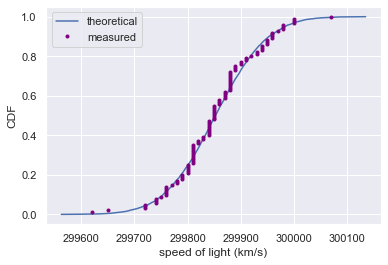

In [145]:
mean = np.mean(df['velocity of light in air (km/s)'])
std = np.std(df['velocity of light in air (km/s)'])

samples = np.random.normal(mean, std, size=10000)
x, y = ecdf(df['velocity of light in air (km/s)'])
x_theor, y_theor = ecdf(samples)

sns.set()
plt.plot(x_theor, y_theor, label='theoretical')
plt.plot(x, y, marker='.', linestyle='none', label='measured', color='purple')
plt.legend()
plt.xlabel('speed of light (km/s)')
plt.ylabel('CDF')
plt.show()

### The Normal PDF

In this exercise, you will explore the Normal PDF and also learn a way to plot a PDF of a known distribution using hacker statistics. Specifically, you will plot a Normal PDF for various values of the variance.

**Instructions**

* Draw 100,000 samples from a Normal distribution that has a mean of `20` and a standard deviation of `1`. Do the same for Normal distributions with standard deviations of `3` and `10`, each still with a mean of `20`. Assign the results to `samples_std1`, `samples_std3` and `samples_std10`, respectively.
* Plot a histograms of each of the samples; for each, use 100 bins, also using the keyword arguments `normed=True` and `histtype='step'`. The latter keyword argument makes the plot look much like the smooth theoretical PDF. You will need to make 3 `plt.hist()` calls.
* Hit 'Submit Answer' to make a legend, showing which standard deviations you used, and show your plot! There is no need to label the axes because we have not defined what is being described by the Normal distribution; we are just looking at shapes of PDFs.

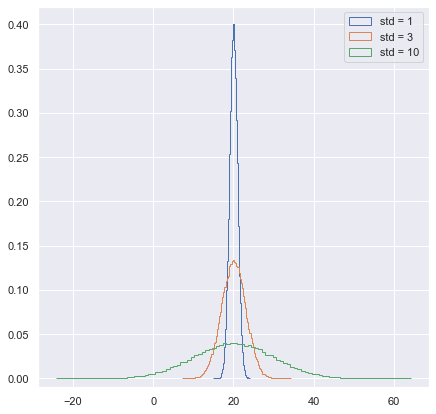

In [148]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Make histograms
plt.figure(figsize=(7, 7))
for data in [samples_std1, samples_std3, samples_std10]:
    plt.hist(data, density=True, bins=100, histtype='step')

# Make a legend, set limits and show plot
plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

**You can see how the different standard deviations result in PDFs of different widths. The peaks are all centered at the mean of 20.**

### The Normal CDF

Now that you have a feel for how the Normal PDF looks, let's consider its CDF. Using the samples you generated in the last exercise (in your namespace as `samples_std1`, `samples_std3`, and `samples_std10`), generate and plot the CDFs.

**Instructions**

* Use your `ecdf()` function to generate x and y values for CDFs: `x_std1`, `y_std1`, `x_std3`, `y_std3` and `x_std10`, `y_std10`, respectively.
* Plot all three CDFs as dots (do not forget the `marker` and `linestyle` keyword arguments!).
* Hit submit to make a legend, showing which standard deviations you used, and to show your plot. There is no need to label the axes because we have not defined what is being described by the Normal distribution; we are just looking at shapes of CDFs.

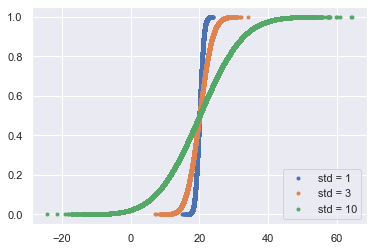

In [149]:
# Generate and Plot CDFs
for data in [samples_std1, samples_std3, samples_std10]:
    x_theor, y_theor = ecdf(data)
    plt.plot(x_theor, y_theor, marker='.', linestyle='none')


# Make a legend and show the plot
plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

**The CDFs all pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal. The width of the CDF varies with the standard deviation.**

## The Normal distribution: Properties and warnings

- The Normal distribution is very important and widely used.
- In practice, it's used to describe most symmetric peaked data
- For many of the statistical procedures you've heard of, Normality assumptions about the data are present.
 - It's a very powerful distribution that seems to be ubiquitous in nature, not just in the field of statistics.
- **There are important caveats about the distribution and we need to be careful when using it.**
 1. A dataset may not be Normally distributed, when you think it is
 1. Another consideration, is the _lightness_ of the distribution tails
  - If we look at the Normal distribution, the probability of being more that 4 standard deviations from the mean, is very small.
  - ![light tails][1]
  - When you're modeling data as Normally distributed, outliers and extremely unlikely.
  - Real datasets often have extreme values, and when this happens, the Normal distribution might not be the best description of the data.
  
  [1]: https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2019-07-10_statistical_thinking_1/light_tails.JPG

### Gauss and the 10 Deutschmark banknote

What are the mean and standard deviation, respectively, of the Normal distribution that was on the 10 Deutschmark banknote?

![deutschmark][1]

**Instructions**

* **mean = 3, std = 1**
* ~~mean = 3, std = 2~~
* ~~mean = 0.4, std = 1~~
* ~~mean = 0.6, std = 6~~

  [1]: https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2019-07-10_statistical_thinking_1/deutschmark.JPG

### Are the Belmont Stakes results Normally distributed?

Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. [Secretariat][1] ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the `np.random.normal()` function and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?

Note: Justin scraped the data concerning the Belmont Stakes from the [Belmont Wikipedia page][2].

**Instructions**

* Compute mean and standard deviation of Belmont winners' times with the two outliers removed. The NumPy array `belmont_no_outliers` has these data.
* Take 10,000 samples out of a normal distribution with this mean and standard deviation using `np.random.normal()`.
* Compute the CDF of the theoretical samples and the ECDF of the Belmont winners' data, assigning the results to `x_theor, y_theor` and `x, y`, respectively.
* Hit submit to plot the CDF of your samples with the ECDF, label your axes and show the plot.

  [1]: https://en.wikipedia.org/wiki/Secretariat_(horse)
  [2]: https://en.wikipedia.org/wiki/Belmont_Stakes

In [151]:
def time_to_sec(x):
    """Convert time in the form 2:28.51 to seconds"""
    time_list = x.split(':')
    return float(time_list[0]) * 60 + float(time_list[1])

In [153]:
df = pd.read_csv(belmont_file)
df['Time_sec'] = df['Time'].apply(time_to_sec)
df.head()

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles,Time_sec
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,2:28.51,Belmont,1.5,148.51
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",2:26.65,Belmont,1.5,146.65
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,2:28.52,Belmont,1.5,148.52
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,2:30.70,Belmont,1.5,150.70
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,2:30.42,Belmont,1.5,150.42


In [155]:
# gets the data in the same format as that used in the exercise
d_std = df['Time_sec'].std()
d_avg = df['Time_sec'].mean()

data = df['Time_sec'][(df['Time_sec'] >= d_avg - (2.5 * d_std)) & (df['Time_sec'] <= d_avg + (2.5 * d_std))]
belmont_no_outliers = np.array(data)

In [156]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

print(f'Mean: {mu:0.02f}\nStandard Deviation: {sigma:0.02f}')

Mean: 149.22
Standard Deviation: 1.62


#### Use `np.random.normal` with **mean** and **std** to get synthetic data

In [159]:
# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10_000)

In [160]:
# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

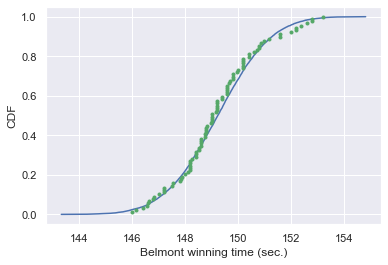

In [162]:
# Plot the CDFs and show the plot
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none', color='g')
plt.xlabel('Belmont winning time (sec.)')
plt.ylabel('CDF')
plt.show()

**The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, Normally distributed. This also suggests that in the last 100 years or so, there have not been major technological or training advances that have significantly affected the speed at which horses can run this race.**

### What are the chances of a horse matching or beating Secretariat's record?

Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?

**Instructions**

* Take 1,000,000 samples from the normal distribution using the `np.random.normal()` function. The mean `mu` and standard deviation `sigma` are already loaded into the namespace of your IPython instance.
* Compute the fraction of samples that have a time less than or equal to Secretariat's time of 144 seconds.
* Print the result.

In [166]:
np.random.seed(seed=398)
print("mu={:.2f} sigma={:.2f}\n".format(mu, sigma))

# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1_000_000)

# Compute the fraction that are faster than 144 seconds: prob
prob = (len(samples[samples < 144]) / len(samples))


# Print the result
print(f'Probability of besting Secretariat: {prob}')

mu=149.22 sigma=1.62

Probability of besting Secretariat: 0.000643


**Great work! We had to take a million samples because the probability of a fast time is very low and we had to be sure to sample enough. We get that there is only a 0.06% chance of a horse running the Belmont as fast as Secretariat.**

## The Exponential distribution

- Just as there are many named discrete distributions, there are many named continuous distributions.
- For example, at the bus stop in Poissonville, we know the number of buses arriving per hour, are Poisson distributed.
 -  The amount of time between arrivals of buses is Exponentially distributed.
- The waiting time between arrivals of a Poisson process is Exponentially distributed.
- The single parameter is the mean waiting time.
- The distribution is not peaked
- ![exponential PDF][1]

### Possible Poisson Process
- Nuclear incidents since 1974:
 - Timing of one is, independent of all others, so the time between incidents should be Exponentially distributed.
- We can compute and plot the CDF we would expect based on the mean time between incidents and overlay that with the ECDF from the real data
- Take the usual approach where we draw many samples out of the Exponential distribution, using the mean inter-incident time as the parameter

```python
mean = np.mean(inter_times)
samples = np.random.exponential(mean, size=10000)
x, y = ecdf(inter_times)
x_theor, y_theor = ecdf(samples)
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('time (days)')
_ = plt.ylabel('CDF')
plt.show()
```
- ![Exponential inter-incident times][2]
- It's close to being Exponentially distributed, indicating nuclear incidents can be modeled as a Poisson process.
- The Exponential and Normal are just two of many examples of continuous distributions.
- In many cases, just simulated the story to get the CDF.
 - If you can simulate a story, you can get the distribution.


  [1]: https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2019-07-10_statistical_thinking_1/exponential_pdf.JPG
  [2]: https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2019-07-10_statistical_thinking_1/exponential_inter-incident_times.JPG

### Matching a story and a distribution

How might we expect the time between Major League no-hitters to be distributed? Be careful here: a few exercises ago, we considered the probability distribution for the number of no-hitters in a season. Now, we are looking at the probability distribution of the time between no hitters.

**Answer the question**

* ~~Normal~~
* __**Exponential**__
* ~~Poisson~~
* ~~Uniform~~

### Waiting for the next Secretariat

Unfortunately, Justin was not alive when Secretariat ran the Belmont in 1973. Do you think he will get to see a performance like that? To answer this, you are interested in how many years you would expect to wait until you see another performance like Secretariat's. How is the waiting time until the next performance as good or better than Secretariat's distributed? Choose the best answer.

**Answer the question**

* ~~Normal, because the distribution of Belmont winning times are Normally distributed.~~
* ~~Normal, because there is a most-expected waiting time, so there should be a single peak to the distribution.~~
* ~~Exponential: It is very unlikely for a horse to be faster than Secretariat, so the distribution should decay away to zero for high waiting time.~~
* __**Exponential: A horse as fast as Secretariat is a rare event, which can be modeled as a Poisson process, and the waiting time between arrivals of a Poisson process is Exponentially distributed.**__

**Correct! The Exponential distribution describes the waiting times between rare events, and Secretariat is rare!**

### If you have a story, you can simulate it!

Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

Now, you will write a function to sample out of the distribution described by this story.

**Instructions**

* Define a function with call signature `successive_poisson(tau1, tau2, size=1)` that samples the waiting time for a no-hitter and a hit of the cycle.
 * Draw waiting times `tau1` (size number of samples) for the no-hitter out of an exponential distribution and assign to `t1`.
 * Draw waiting times `tau2` (size number of samples) for hitting the cycle out of an exponential distribution and assign to `t2`.
 * The function returns the sum of the waiting times for the two events.

#### def successive_poisson

In [167]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

### Distribution of no-hitters and cycles

Now, you'll use your sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

**Instructions**

* Use your `successive_poisson()` function to draw 100,000 out of the distribution of waiting times for observing a no-hitter and a hitting of the cycle.
* Plot the PDF of the waiting times using the step histogram technique of a previous exercise. Don't forget the necessary keyword arguments. You should use `bins=100`, `normed=True`, and `histtype='step'`.
* Label the axes.
* Show your plot.

In [168]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, 100_000)

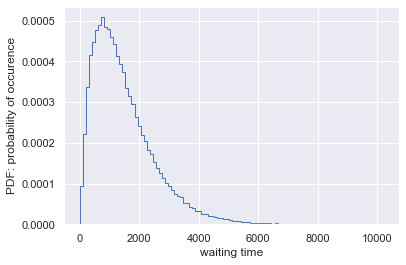

In [169]:
# Make the histogram
plt.hist(waiting_times, density=True, bins=100, histtype='step')
plt.xlabel('waiting time')
plt.ylabel('PDF: probability of occurence')
plt.show()

**Notice that the PDF is peaked, unlike the waiting time for a single Poisson process. For fun (and enlightenment), I encourage you to also plot the CDF.**

#### CDF for observing a no-hitter and a hitting of the cycle.

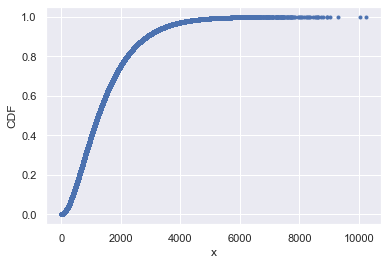

In [170]:
x_theor, y_theor = ecdf(waiting_times)
plt.plot(x_theor, y_theor, marker='.', linestyle='none')
plt.ylabel('CDF')
plt.xlabel('x')
plt.show()

## Final thoughts and encouragement toward Statistical Thinking II

**You can now**

- Construct instructive plots
- Computer informative summary statistics
- Use "hacker" statistics
- Think probabilistically
- The knowledge learned in this course really shines when directly applied to _**statistical inference**_ problems.

**In the next course**

- Estimate parameter values
- Perform linear regressions
- Compute confidence intervals to couch the conclusions drawn from data in the appropriate probabilistic language
- Perform hypothesis tests, such as A/B tests, to help discern differences between data sets.